# Getting Started with pySmash

*pysmash: A Python Package for the Mine of Significant Fragments from Specific Dataset*

This document intends to provide users with the basic operation methods of pySmash. If you find any mistake or have suggestions for improvements, please either fix them in the source document (the .py file) or send to the mailing list: oriental-cds@163.com and kotori@cbdd.me.

## Installing the pySmash package

### Dependencies

```
rdkit=="2019.03.1"
pandas
numpy
```
**Notice:** More least version of RDKit may throw an unexpection.

### Install with source

```
git clone git@github.com:kotori-y/pySmash.git && cd scopy
[sudo] python setup.py install
```

## pySmash Tutorial

This tutorial will take **ISSCAN** database on chemical carcinogens, which can be downloaded from [here](http://old.iss.it/meca/index.php?lang=1&anno=2013&tipo=25), with **jupyter-notebook** environment as an example  to show how to use **pySmash** package.

In [1]:
#rdkit modules
from rdkit import Chem

# science modules
import pandas as pd
import numpy as np

#Display
import IPython
from rdkit.Chem.Draw import IPythonConsole

In [2]:
data = pd.read_csv('./datasets/Carc/Carc.txt', sep='\t') # loading data
pd.set_option('display.max_rows', 10)
data

,SMILES,Label
0,CN(c1ccc(cc1)N=Nc1ccccc1)C,1
1,CC(=O)Nc1cccc2c1c1ccccc1C2,0
2,c1cc2ccc3c4c2c(c1)ccc4ccc3,0
3,ClC(Cl)Cl,1
4,CC/C(=C(\c1ccc(cc1)O)/CC)/c1ccc(cc1)O,1
...,...,...
1047,COc1cc(Cl)c(cc1NC(=O)C(C(=O)C)N=Nc1ccc(cc1Cl)c...,0
1048,CN1C2CCC1CC(C2)NC(=O)c1cc(Cl)cc2c1OC(C2)(C)C,0
1049,O=C1C=CC(=O)C=C1,1
1050,c1ccc2c(c1)sc(n2)SSc1nc2c(s1)cccc2,0


The filed Label 1 = carcinogen(i.e. positive) and 0 = noncarcinogen(i.e. negative)

In [3]:
mols = [Chem.MolFromSmiles(smi) for smi in data.SMILES.values]
labels = data.Label.values

### Generating Significant  Fragments

**pySmash** provides 3 Class, including <code>CircularLearner</code>, <code>PathLearner</code> and <code>FunctionGroupLearner</code> to generate different significant fragments respectively based on the given labels and statistical method.

#### Circular Fragment

The class <code>CircularLearner</code> was implemented for obtaining significant circular fragment which is built by applying the Morgan algorithm. When generating circular fragments, Morgan fingerprints are calculated firstly under the given radius, and then circular fragments would be retrieved through combining the information of each bit with specific function.

<center>
<img src="image/flow.png" style="margin-bottom:-3px" width="700" align="center">
<br>
    <div style="color:orange; border-bottom: 1px solid #d9d9d9;
    display: inline-block;
    color: #999;
    padding: 2px;">The Circular Fragments Generated Mechanism</div>
</center>

In [4]:
from smash import CircularLearner

The <code>CircularLearner</code> could accept 6 parameters:
    
 - minRadius : int, optional
        The probable minimum radius of circular fragment, by default 1
 - maxRadius : int, optional
        The probable maximum radius of circular fragment, by default 2
 - nBits : int, optional
        The number of bit of morgan, by default 1024
        this param would be ignored, if the folded set as False.
 - folded : bool, optional
        which generate fragment based on unfolded fingerprint, by default True.
 - maxFragment : bool, optional
        Whether only return the maximum fragment at a center atom, by default True
 - nJobs : int, optional
        The number of CPUs to use to do the computation, by default 1

In [5]:
# Instantiate
cirLearner = CircularLearner(minRadius=1, maxRadius=4)

Through calling <code>fit()</code> method, the learner can systematically conclude the significant fragments under given condition. The <code>fit()</code> method could accept 8 parameters to limit the generated fragments.

 - mols : Iterable object, and each element is a rdkit.Chem.rdchem.Mol object.
        Compounds, which have aspecific endpoint label, used to obtain significant fragments
 
 - labels : array-like of shape (len(mols),).
        The target values (class labels in classification)
 
 - aimLabel : any, optional.
        The label to be regarded as active label (class labels in classification), by default 1.
 
 - minNum : int, optional.
        The minimum frequency a fragment required, by default 5.
 
 - pCutoff : float, optional.
        The pvalue cutoff, a fragment would be regarded as significant if its pvalue below pCutoff, by default 0.05.
 
 - accCutoff : float, optional.
        The minimum accraucy lead by a fragment judge, by default None.
 
 - Bonferroni : bool, optional.
        Whether use Bonferroni method to revised, by default False.
 
 - svg : bool, optional.
        Whether output with a svg image, by default True.
  
The method would return two variables: <code>sigPvalue</code> and <code>sigMatrix</code>.

 - sigPvalue : pandas.core.frame.DataFrame
        The statistical information of significant fragments
        
 - sigMatrix : pandas.core.frame.DataFrame
        The significant fragments matrix

In [10]:
sigCirPvalue, sigCirMatrix = cirLearner.fit(mols, labels)

 - $P_{value}$, the method to judge a fragment is significant, is calculated through the probability density function of the binomial distribution with following equation: 

    $$P_{value}=\Sigma_{i=ms}^{ns}\frac{ns!}{i!(ns-i)!}(\frac{m}{n})^{i}(1-\frac{m}{n})^{ns-i}$$
 
 
 - The statistic metrics $Accuracy$ and $Coverage$ is calculated with following equation:
    $$Accuracy = \frac{ms}{ns}; Coverage = \frac{ms}{m}$$
    

where $n$ and $m$ present the number of the whole compounds and the compounds with aim label respectively, and specific fragment is found in $ns$ ("Total" in table) compounds the amount of those compounds with the specific aim label is $ms$ ("Hitted" in table).

The default highlight colors for the Morgan bits indicate:

 - blue: the central atom in the environment


 - yellow: aromatic atoms


 - gray: aliphatic ring atoms

In [11]:
# sigPvalue should be transformed to .HTML for save or (and) displsy
IPython.display.HTML(sigCirPvalue.to_html(escape=False))

In [12]:
sigCirMatrix

,2380084179,3153453529,3356397823,3440991424,1470580613,1083852209,1147919419,3095540251,2378775366,526982671,...,1330196390,2378779377,198706261,1495075844,2803848648,3575264755,3989046787,4235614536,535847852,2909042096
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1048,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1049,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1050,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Path Fragment

The class <code>PathLearner</code> was designed for generating significant path fragment which based on an algorithm that identifies all subgraphs in the molecule within a particular range of sizes. Like the generation of circular fragments, the RDKit fingerprints would be calculated at first under given condition. Through the bitinfo of fingerprints, the fragments would be generated.

In [14]:
from smash import PathLearner

The <code>PathLearner</code> could accept 6 parameters:

 - minPath : int, optional.
        The probable minimum length of path-based fragment, by default 1.
 
 - maxPath : int, optional.
        The probable maximum length of path-based fragment, by default 7.
 
 - nBits : int, optional.
        The dimension of daylight fingerprints to be folded, this param would be ignored, if the folded set as False, by default 1014.
 
 - folded : bool, optional.
        Whether use the folded daylight fingerprints, by default False.
 
 - maxFragment : bool, optional.
        Whether only return the maximum fragment at a start atom, by default True.
 
 - nJobs : int, optional.
        The number of CPUs to use to do the computation, by default 1.

In [16]:
# Instantiate
pathLearner = PathLearner(minPath=1, maxPath=7)
# Fit
sigPathPvalue, sigPathMatrix = pathLearner.fit(mols, labels, aimLabel=1)

In [17]:
IPython.display.HTML(sigPathPvalue.to_html(escape=False))

,Pvalue,Total,Hitted,Accuracy,Coverage,SMARTS,Substructure
480113190,1.529573e-11,128,117,0.914062,0.168588,CCNN,<?xml version='1.0' encoding='iso-8859-1'?><!-- END OF HEADER --> NHNH2
1856304663,1.529573e-11,128,117,0.914062,0.168588,CN(C)N,<?xml version='1.0' encoding='iso-8859-1'?><!-- END OF HEADER --> NNH2
4276258003,1.626070e-11,194,169,0.871134,0.243516,NN,<?xml version='1.0' encoding='iso-8859-1'?><!-- END OF HEADER --> H2NNH2
278227040,3.857712e-11,182,159,0.873626,0.229107,CNN,<?xml version='1.0' encoding='iso-8859-1'?><!-- END OF HEADER --> NHNH2
2172716209,1.305487e-09,220,185,0.840909,0.266571,[NH2+]=O,<?xml version='1.0' encoding='iso-8859-1'?><!-- END OF HEADER --> N+O
3901489279,1.716633e-09,93,86,0.924731,0.123919,CCN(C)N=O,<?xml version='1.0' encoding='iso-8859-1'?><!-- END OF HEADER --> NNO
3436234336,3.740239e-09,106,96,0.905660,0.138329,CN(C)N=O,<?xml version='1.0' encoding='iso-8859-1'?><!-- END OF HEADER --> ONN
2414583053,1.210654e-07,46,45,0.978261,0.064841,CN(N)C=O,<?xml version='1.0' encoding='iso-8859-1'?><!-- END OF HEADER --> NNH2O
4282884236,6.775838e-06,77,68,0.883117,0.097983,CCCNN,<?xml version='1.0' encoding='iso-8859-1'?><!-- END OF HEADER --> NHNH2
88390985,1.335891e-05,34,33,0.970588,0.047550,CCN(N)C=O,<?xml version='1.0' encoding='iso-8859-1'?><!-- END OF HEADER --> NNH2O


In [18]:
sigPathMatrix

,480113190,1856304663,4276258003,278227040,2172716209,3901489279,3436234336,2414583053,4282884236,88390985,...,3578660590,3378433109,3760131119,4183134360,1428860189,1269551533,3723312321,3511476105,443742105,3926338089
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1048,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1049,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1050,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Functional Group Fragments

The class <code>FunctionGroupLearner</code> was developed to allow user obtain the significant functional group fragments, which based on a new algorithm to identify all functional groups in organic molecules is presented. More detail see [Peter Ertl (2017)](https://doi.org/10.1186/s13321-017-0225-z).

In [19]:
from smash import FunctionGroupLearner

The class <code>FunctionGroupLearner</code> could only accept one parameter
 
 - nJobs : int, optional.
        The number of CPUs to use to do the computation, by default 1

In [20]:
# Instantiate
fgLearner = FunctionGroupLearner()
# Fit
sigFgPvalue, sigFgMatrix = fgLearner.fit(mols, labels, aimLabel=1)

In [23]:
IPython.display.HTML(sigFgPvalue.to_html(escape=False))

In [24]:
sigFgMatrix

,CN(C)N=O,cN,coc,CN(N=O)C(N)=O,cC(c)=O,c[N+](=O)[O-],CNN,CNC(=O)N(C)N=O,CC1CO1,CCl,C=CC
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1047,0,0,0,0,0,0,0,0,0,0,0
1048,0,0,0,0,0,0,0,0,0,0,0
1049,0,0,0,0,0,0,0,0,0,0,0
1050,0,0,0,0,0,0,0,0,0,0,0


### Predicting no-Label molecules

For each *Learner*, the <code>predict</code> method to predict the no-Label molecules.

In [26]:
from rdkit.Chem import Draw

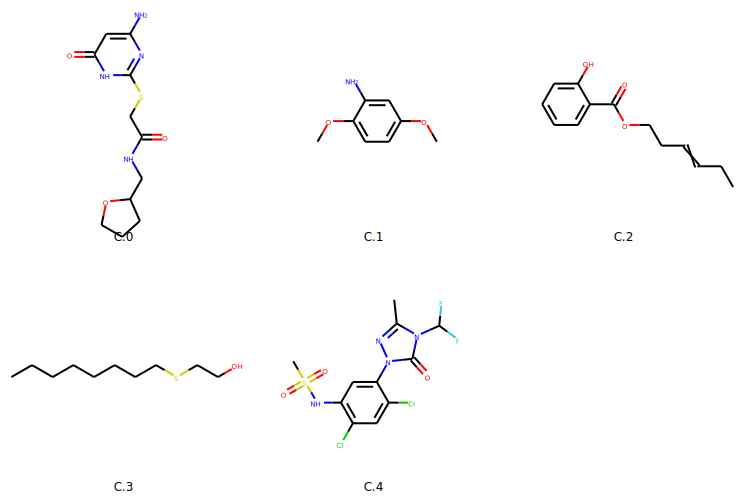

In [64]:
test = Chem.SDMolSupplier(r"C:\Users\0720\Desktop\py_work\pySmash\tutorial\datasets\Parp\test.sdf")
testMols = [mol for mol in test]
Draw.MolsToGridImage(
    testMols, molsPerRow=3, 
    subImgSize=(250,250), useSVG=True, 
    legends=[f'C.{x}' for x in range(len(testMols))]
)

In [65]:
cirPred, cirPredMatrix = cirLearner.predict(testMols)

The <code>cirPred</code> method would return two variable: the predicted label and corresponding fragment matrix.

In [66]:
cirPred

array([1, 1, 0, 0, 0])

In [67]:
cirPredMatrix

,2380084179,3153453529,3356397823,3440991424,1470580613,1083852209,1147919419,3095540251,2378775366,526982671,...,1330196390,2378779377,198706261,1495075844,2803848648,3575264755,3989046787,4235614536,535847852,2909042096
0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


From the predicted results, the C.0, 1 and 4 have been predicted as carcinogen (Label=1), and the three compounds both contain the *1083852209* circular fragment.

In [75]:
IPython.display.HTML(sigCirPvalue.loc[1083852209, 'Substructure'])

In [77]:
smart = sigPvalue.SMARTS[1083852209]
patt = Chem.MolFromSmarts(smart)

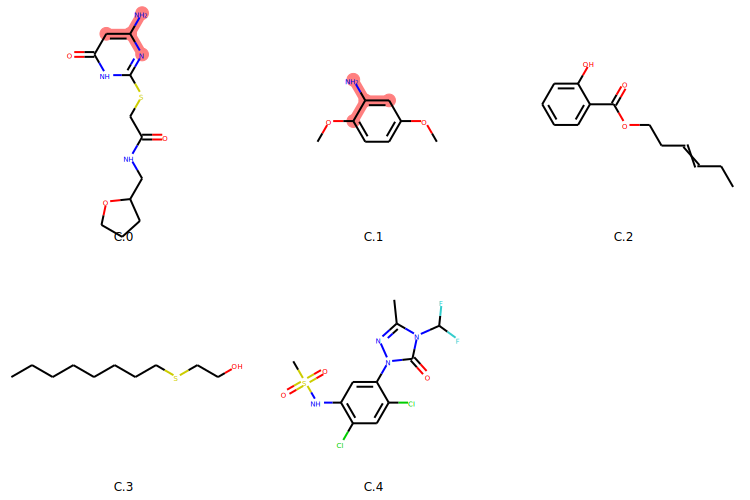

In [78]:
Draw.MolsToGridImage(
    testMols, molsPerRow=3, 
    subImgSize=(250,250), useSVG=True, 
    legends=[f'C.{x}' for x in range(len(testMols))],
    highlightAtomLists=[mol.GetSubstructMatch(patt) for mol in testMols]
)

Besides, through the <code>saveModel</code> method, user can save the fitted learner to predicted other molecules.

In [20]:
#save learner
cirLearner.saveModel('./cirLearner.pkl')
pathLearner.saveModel('./pathLearner.pkl')
fgLearner.saveModel('./fgLearner.pkl')